In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
file_path = r'C:\Users\Alex Jarboe\Downloads\simulated_health_wellness_data.csv'
df = pd.read_csv(file_path)

In [21]:
print('Data head:')
print(df.head())

Data head:
   Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
0          34.967142                      5               7.618856   
1          28.617357                      8               4.105473   
2          36.476885                      4               6.024123   
3          45.230299                      1               8.565319   
4          27.658466                      3               8.301648   

   Stress_Level        BMI  
0             2  33.068556  
1             7  27.267672  
2             1  23.779217  
3             8  29.820436  
4             3  30.947352  


In [23]:
print('\
Column names:')
print(df.columns.tolist())

Column names:
['Exercise_Time_Min', 'Healthy_Meals_Per_Day', 'Sleep_Hours_Per_Night', 'Stress_Level', 'BMI']


In [25]:
numeric_df = df.select_dtypes(include=['number'])
print('\
Numeric columns head:')
print(numeric_df.head())

Numeric columns head:
   Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
0          34.967142                      5               7.618856   
1          28.617357                      8               4.105473   
2          36.476885                      4               6.024123   
3          45.230299                      1               8.565319   
4          27.658466                      3               8.301648   

   Stress_Level        BMI  
0             2  33.068556  
1             7  27.267672  
2             1  23.779217  
3             8  29.820436  
4             3  30.947352  


In [27]:
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_df)

In [29]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_numeric)

In [31]:
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_numeric)
pca_df['Cluster'] = kmeans_labels

C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


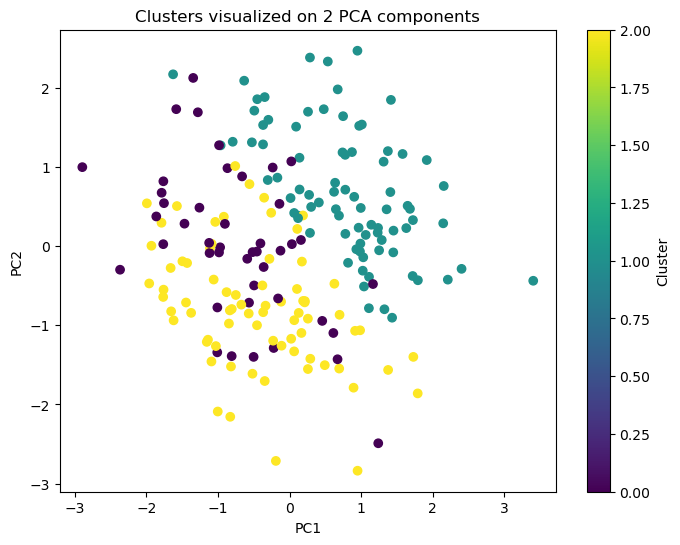

In [35]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Clusters visualized on 2 PCA components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [37]:
print('Clustering and PCA dimensionality reduction complete.')

Clustering and PCA dimensionality reduction complete.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [41]:
numeric_df = df.select_dtypes(include=['number'])
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_df)

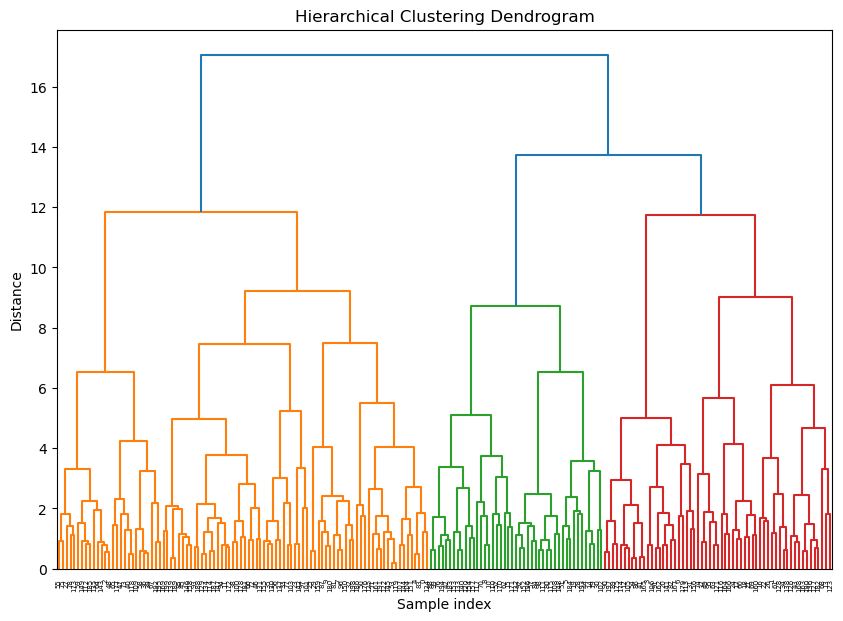

In [43]:
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(scaled_numeric, method='ward'))
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [47]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_labels = hc.fit_predict(scaled_numeric)

In [49]:
from sklearn.decomposition import PCA
if 'pca_df' not in globals():
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(scaled_numeric)
    pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

In [51]:
pca_df['HC_Cluster'] = hc_labels

In [53]:
if 'Cluster' not in pca_df.columns:
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_numeric)
    pca_df['Cluster'] = kmeans_labels

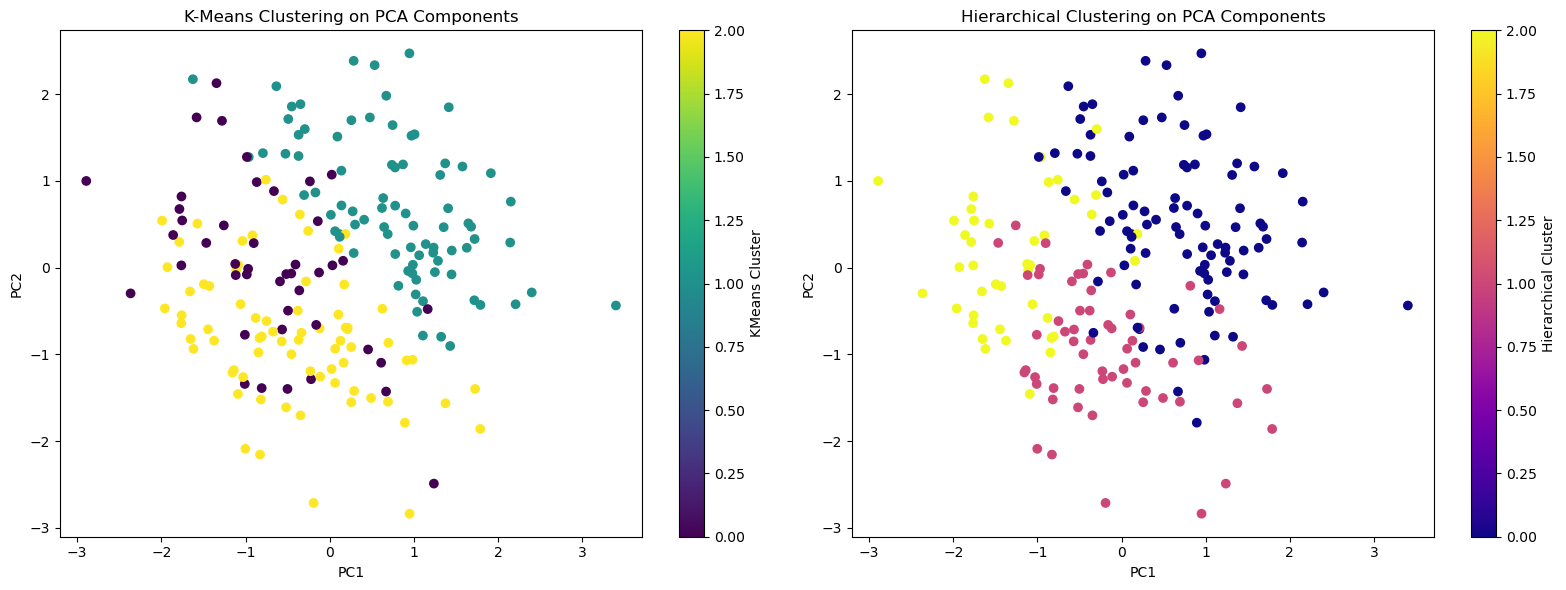

In [55]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
scatter1 = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering on PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter1, label='KMeans Cluster')

plt.subplot(1,2,2)
scatter2 = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['HC_Cluster'], cmap='plasma')
plt.title('Hierarchical Clustering on PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter2, label='Hierarchical Cluster')

plt.tight_layout()
plt.show()

In [57]:
print('K-Means and Hierarchical clustering applied. Dendrogram and PCA cluster plots created.')

K-Means and Hierarchical clustering applied. Dendrogram and PCA cluster plots created.


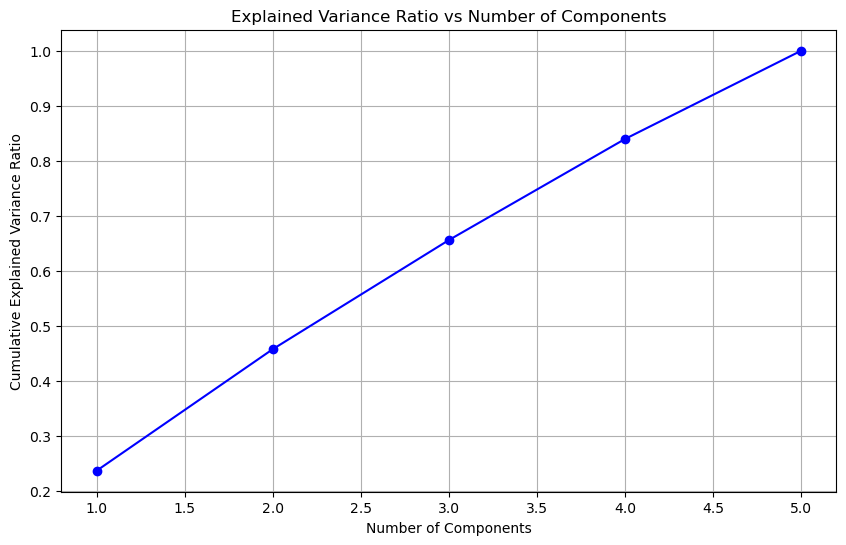

Explained variance ratio by component:
PC1: 0.237 (23.7%)
PC2: 0.221 (22.1%)
PC3: 0.198 (19.8%)
PC4: 0.184 (18.4%)
PC5: 0.160 (16.0%)
Cumulative explained variance ratio:
First 1 PCs: 0.237 (23.7%)
First 2 PCs: 0.458 (45.8%)
First 3 PCs: 0.656 (65.6%)
First 4 PCs: 0.840 (84.0%)
First 5 PCs: 1.000 (100.0%)
Component loadings:
                            PC1       PC2       PC3       PC4       PC5
Exercise_Time_Min      0.343398 -0.478061 -0.333904  0.734869 -0.044850
Healthy_Meals_Per_Day  0.395626  0.060977  0.827777  0.249458  0.303839
Sleep_Hours_Per_Night -0.220185  0.687225 -0.249983  0.463779  0.449064
Stress_Level          -0.530921 -0.543546  0.067476 -0.035438  0.645656
BMI                    0.628649  0.004418 -0.369119 -0.425902  0.535855


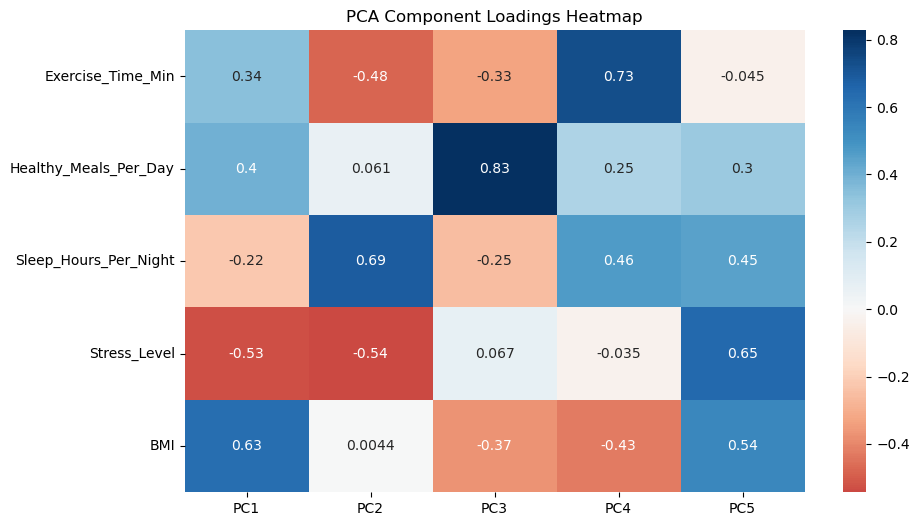

C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


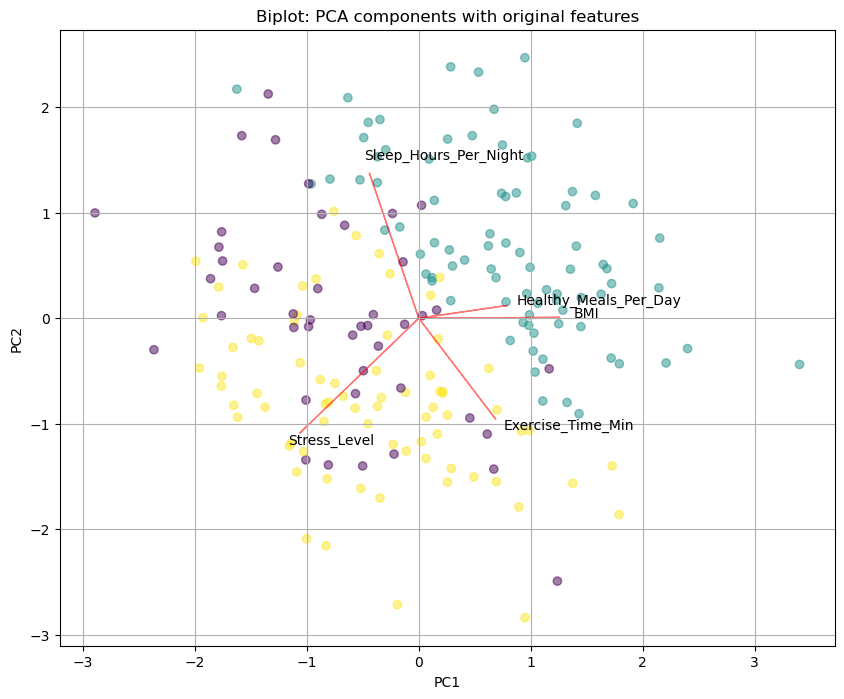

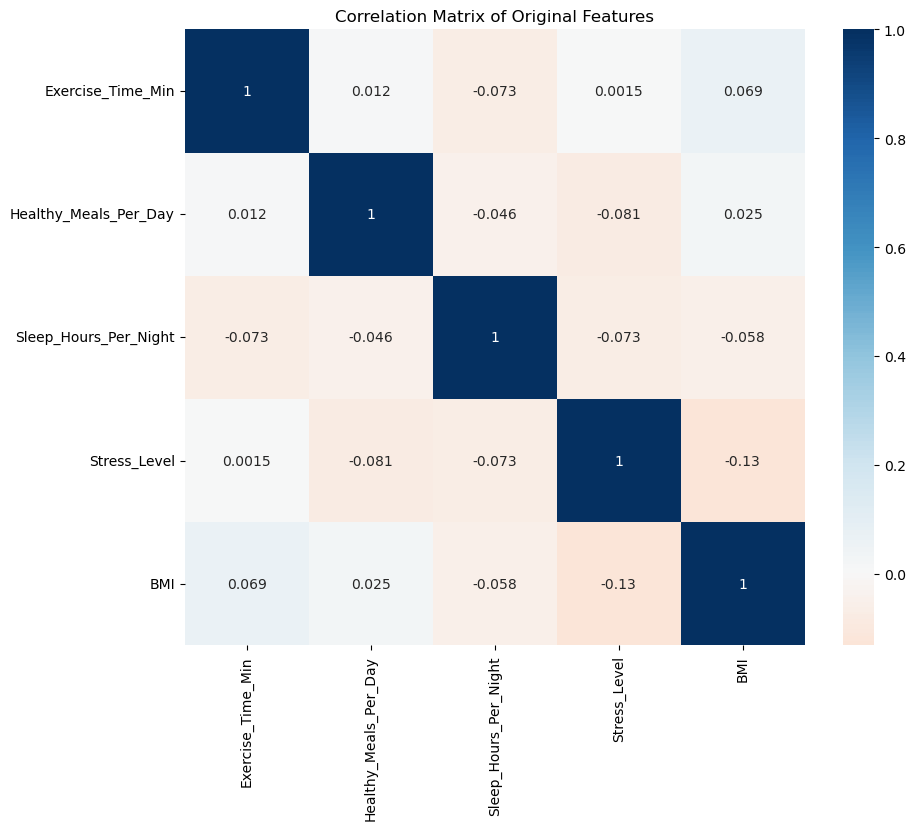

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


features = ['Exercise_Time_Min', 'Healthy_Meals_Per_Day', 'Sleep_Hours_Per_Night', 'Stress_Level', 'BMI']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()


print("Explained variance ratio by component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.3f} ({ratio*100:.1f}%)")

print("\
Cumulative explained variance ratio:")
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"First {i+1} PCs: {ratio:.3f} ({ratio*100:.1f}%)")


loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    index=features)

print("\
Component loadings:")
print(loadings)


plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='RdBu', center=0)
plt.title('PCA Component Loadings Heatmap')
plt.show()


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.figure(figsize=(10,8))
    plt.scatter(xs, ys, c=df['Cluster'], cmap='viridis', alpha=0.5)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*2, coeff[i,1]*2, color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*2.2, coeff[i,1]*2.2, "Var"+str(i+1))
        else:
            plt.text(coeff[i,0]*2.2, coeff[i,1]*2.2, labels[i])

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.title('Biplot: PCA components with original features')


biplot(X_pca[:,:2], np.transpose(pca.components_[:2, :]), features)
plt.show()


correlation_matrix = df[features].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0)
plt.title('Correlation Matrix of Original Features')
plt.show()

C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

Original Data Clustering Metrics:
Silhouette Score: 0.152
Calinski-Harabasz Score: 34.524
Davies-Bouldin Score: 1.883
Inertia: 740.466
PCA with 2 components:
Explained Variance: 0.458
Silhouette Score: 0.363
Calinski-Harabasz Score: 138.070
Davies-Bouldin Score: 0.909
Inertia: 190.588
PCA with 3 components:
Explained Variance: 0.656
Silhouette Score: 0.239
Calinski-Harabasz Score: 68.205
Davies-Bouldin Score: 1.303
Inertia: 387.622
PCA with 4 components:
Explained Variance: 0.840
Silhouette Score: 0.189
Calinski-Harabasz Score: 43.425
Davies-Bouldin Score: 1.627
Inertia: 582.742
PCA with 5 components:
Explained Variance: 1.000
Silhouette Score: 0.152
Calinski-Harabasz Score: 34.524
Davies-Bouldin Score: 1.883
Inertia: 740.466


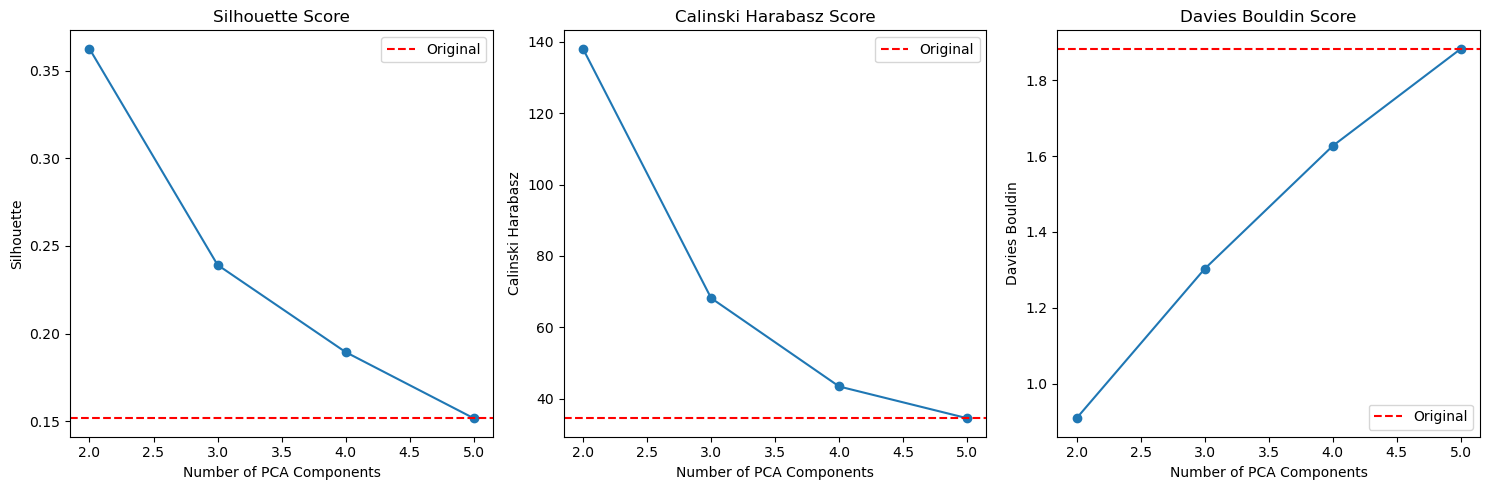

C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex Jarboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

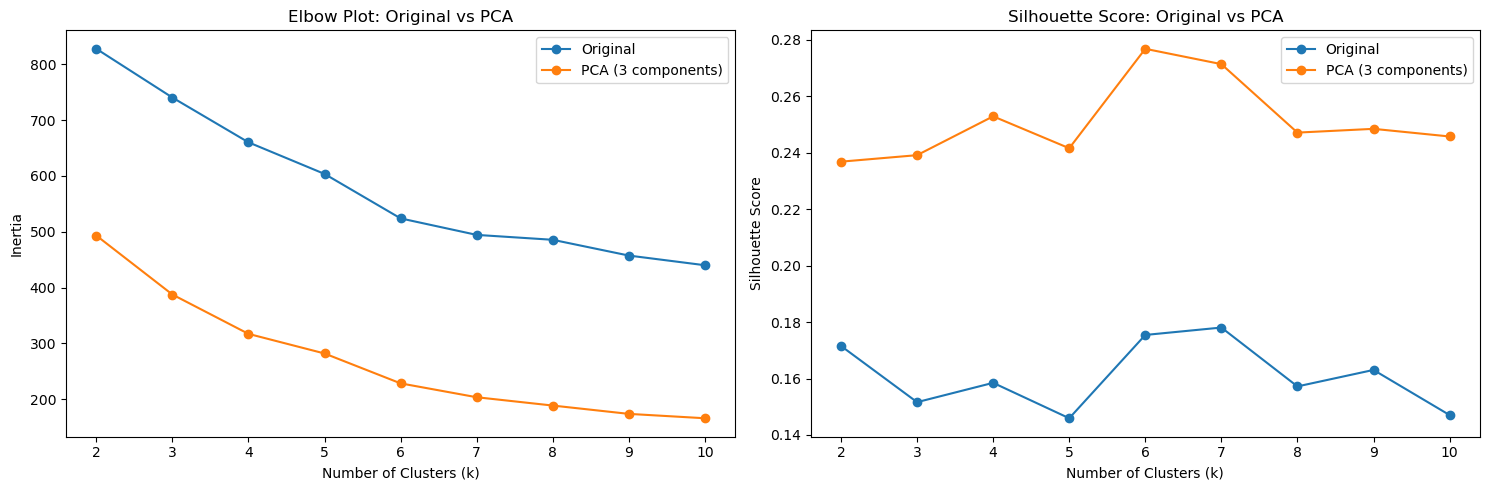

Optimal number of clusters:
Original data: 7 clusters (Silhouette score: 0.178)
PCA data: 6 clusters (Silhouette score: 0.277)


In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'C:\Users\Alex Jarboe\Downloads\simulated_health_wellness_data.csv')
features = ['Exercise_Time_Min', 'Healthy_Meals_Per_Day', 'Sleep_Hours_Per_Night', 'Stress_Level', 'BMI']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


def evaluate_clustering(X, n_clusters, model_name=""):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Calculate metrics
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)
    inertia = kmeans.inertia_
    
    return {
        'silhouette': silhouette,
        'calinski_harabasz': calinski,
        'davies_bouldin': davies,
        'inertia': inertia,
        'labels': labels
    }


n_components_range = range(2, 6)
n_clusters = 3
results = []


original_metrics = evaluate_clustering(X_scaled, n_clusters, "Original")
print("Original Data Clustering Metrics:")
print(f"Silhouette Score: {original_metrics['silhouette']:.3f}")
print(f"Calinski-Harabasz Score: {original_metrics['calinski_harabasz']:.3f}")
print(f"Davies-Bouldin Score: {original_metrics['davies_bouldin']:.3f}")
print(f"Inertia: {original_metrics['inertia']:.3f}")


for n_comp in n_components_range:
    pca = PCA(n_components=n_comp)
    X_pca_reduced = pca.fit_transform(X_scaled)
    metrics = evaluate_clustering(X_pca_reduced, n_clusters, f"PCA-{n_comp}")
    results.append({
        'n_components': n_comp,
        'explained_variance': np.sum(pca.explained_variance_ratio_),
        **metrics
    })
    
    print(f"\
PCA with {n_comp} components:")
    print(f"Explained Variance: {np.sum(pca.explained_variance_ratio_):.3f}")
    print(f"Silhouette Score: {metrics['silhouette']:.3f}")
    print(f"Calinski-Harabasz Score: {metrics['calinski_harabasz']:.3f}")
    print(f"Davies-Bouldin Score: {metrics['davies_bouldin']:.3f}")
    print(f"Inertia: {metrics['inertia']:.3f}")


metrics_to_plot = ['silhouette', 'calinski_harabasz', 'davies_bouldin']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, metric in enumerate(metrics_to_plot):
    values = [r[metric] for r in results]
    axes[i].plot(range(2, 6), values, marker='o')
    axes[i].axhline(y=original_metrics[metric], color='r', linestyle='--', label='Original')
    axes[i].set_xlabel('Number of PCA Components')
    axes[i].set_ylabel(metric.replace('_', ' ').title())
    axes[i].set_title(f'{metric.replace("_", " ").title()} Score')
    axes[i].legend()

plt.tight_layout()
plt.show()


max_clusters = 10
inertias_original = []
inertias_pca = []
silhouette_scores_original = []
silhouette_scores_pca = []


X_pca_3 = PCA(n_components=3).fit_transform(X_scaled)

for k in range(2, max_clusters + 1):
   
    kmeans_original = KMeans(n_clusters=k, random_state=42)
    kmeans_original.fit(X_scaled)
    inertias_original.append(kmeans_original.inertia_)
    silhouette_scores_original.append(silhouette_score(X_scaled, kmeans_original.labels_))
    
    
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(X_pca_3)
    inertias_pca.append(kmeans_pca.inertia_)
    silhouette_scores_pca.append(silhouette_score(X_pca_3, kmeans_pca.labels_))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


ax1.plot(range(2, max_clusters + 1), inertias_original, marker='o', label='Original')
ax1.plot(range(2, max_clusters + 1), inertias_pca, marker='o', label='PCA (3 components)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Plot: Original vs PCA')
ax1.legend()


ax2.plot(range(2, max_clusters + 1), silhouette_scores_original, marker='o', label='Original')
ax2.plot(range(2, max_clusters + 1), silhouette_scores_pca, marker='o', label='PCA (3 components)')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score: Original vs PCA')
ax2.legend()

plt.tight_layout()
plt.show()


optimal_k_original = silhouette_scores_original.index(max(silhouette_scores_original)) + 2
optimal_k_pca = silhouette_scores_pca.index(max(silhouette_scores_pca)) + 2

print("\
Optimal number of clusters:")
print(f"Original data: {optimal_k_original} clusters (Silhouette score: {max(silhouette_scores_original):.3f})")
print(f"PCA data: {optimal_k_pca} clusters (Silhouette score: {max(silhouette_scores_pca):.3f})")